<a href="https://colab.research.google.com/github/ming-zhao/AIML_for_Business/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -.-|m { input: false, output: false, output_error: false}
%load_ext pretty_jupyter

Execute the following code block to import all necessary packages.

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from urllib.request import urlopen
from keras import models, layers
from keras import backend as K
from keras.utils import to_categorical
from keras.utils.data_utils import get_file

%matplotlib inline

base = ("https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io"
        "/master/AIML_for_Business/Neural_Networks/")

# Neural Networks

Artificial intelligence (AI) has been a subject of intense media hype. Machine learning, deep learning, and AI come up in countless articles, often outside of technology-minded publications. 

Artificial intelligence was born in the 1950s, when computer scientists began exploring the possibility of making computers "think." AI is defined as the effort to automate tasks performed by humans. The field encompasses machine learning and deep learning, but also includes approaches that don't involve any learning. Symbolic AI, which involves programmers handcrafting a set of rules to manipulate knowledge, was the dominant paradigm in AI until the late 1980s. However, it proved intractable for solving complex problems, leading to the rise of machine learning as a new approach.

The concept of machine learning is a programming paradigm that allows computers to learn on their own how to perform a task by looking at data, instead of relying on human-crafted rules. 
\begin{align}
\left.
\begin{aligned}
\text{Rules} \longrightarrow \\
\text{Data} \longrightarrow 
\end{aligned} \right| 
&\text{Classical programming} \longrightarrow \text{Answer} \\
\\
\left.
\begin{aligned}
\text{Data} \longrightarrow \\
\text{Answer} \longrightarrow 
\end{aligned} \right| 
&\text{Machine learning} \longrightarrow \text{Rules}
\end{align}

Unlike classical programming, where humans input rules and data, and out come answers, machine learning systems are trained by presenting them with many examples relevant to a task, allowing them to find statistical structure in the data and eventually come up with rules for automating the task. Machine learning has become the most popular and successful subfield of AI, driven by faster hardware and larger datasets.

Deep learning is a subfield of machine learning that involves learning successive layers of increasingly meaningful representations from data. It often involves lots of (tens or hundreds) of layers of representations learned automatically from training data via models called **neural networks**. The deep in deep learning isn't a reference to any kind of deeper understanding achieved by the approach; rather, it stands for this idea of successive layers of representations.

Deep learning is a complex field that requires familiarity with some concepts. Our approach is to build your intuition about these concepts without getting bogged down in overly technical details. This will help you understand the fundamental ideas behind deep learning and how they can be applied to real-world problems.

## Tensor: where it starts

Tensors are fundamental to the data representations for neural networks. Another name for the same concept is multidimensional array. The dimensionality of a tensor coincides with the number of indexes used to refer to scalar values within the tensor.

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/tensor.png" width="500">
</center>
    
- Scalars: 0 dimensional tensors

- Vectors: 1 dimensional tensors

- Matrix: 2 dimensional tensors

Let's make data tensors more concrete with real-world examples:

- Vector data — 2D tensors of shape (samples, features)

- Timeseries data or sequence data — 3D tensors of shape (samples, timesteps, features)

- Images — 4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)

- Video — 5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

## Layers: the building blocks of deep learning

A layer in a neural network is a collection of nodes or neurons responsible for learning specific features from input data. Each layer takes one or more input tensors and outputs one or more output tensors, forming a hierarchical structure of learned features.

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/NN_layers.jpg" width="500">
</center>
    
A crucial aspect of each layer is its set of weights ($w_i$ in the simplified representation), which are learned during training and determine the contribution of each input feature to the output. These weights control how much each input feature affects the layer's output and are adjusted during training to improve the model's performance. In summary, a neural network layer is a data-processing module that learns meaningful representations of the input data, which are used to make predictions or classifications.

An example of a simple neural network with one input node, two hidden nodes, and one output node can be seen in the included [Excel file](https://github.com/ming-zhao/ming-zhao.github.io/blob/master/AIML_for_Business/Neural_Networks/data/SimpleNeuralNetwork.xlsx?raw=true). 

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/simpleNN.png" width="700">
</center>
    
By varying the input value, the output value exhibits a non-linearity.

## Activation functions: beyond the linearity

As we have seen, the simplest unit in (deep) neural networks is a linear operation (scaling + offset) followed by an activation function.

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/activation.jpg" width="700">
</center>
    
where the linear operation is often performed as matrix multiplication.

Activation functions sound complicated, but the most common activation function these days is ReLU, or rectified linear unit. Which again sounds complicated! But all it turns out to be is a function that implements $max(0,x)$, so the result is 0 if the input is negative, or just the input ($x$) if $x$ is positive. The graphs illustrate the shape of some commonly used activation functions and how they transform input values to output values. 

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/activation2.jpg" width="600">
</center>    

Another very important activation function *softmax*, which is a little more complicated mathematically. Basically it produces a set of values between 0 and 1 that adds up to 1 (probabilities!) and weights the values so it exaggerates differences—that is, it produces one result in a vector higher than everything else. It is often used at the end of a classification network to ensure that that network makes a definite prediction about what class it thinks the input belongs to.

Without activation functions, neural network falls back to being a linear model. Since the layers of linear operations is still a linear operation, the absence of activation functions makes the network unable to learn nonlinear relationships between inputs and outputs. The following are true for the activation functions:

- They have at least one sensitive range, where nontrivial changes to the input result in a corresponding nontrivial change to the output. This is needed for training.

- Many of them have an insensitive (or saturated) range, where changes to the input result in little or no change to the  output.

## Loss function and optimizer: less is what we want

A loss function (or cost function) is a function that computes a single numerical value that the learning process will attempt to minimize. The calculation of loss typically involves taking the difference between the desired outputs (labels) for some training samples and the outputs actually produced by the model when fed those samples.

The optimizer determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).

## Models: networks of layers

A deep learning model is typically composed of multiple layers of interconnected nodes or neurons. In a feedforward neural network (FNN), information flows through the layers in one direction only, with no feedback connections between nodes. This makes FNNs suitable for many classification and regression tasks.

In contrast, a recurrent neural network (RNN) has connections between nodes that can form cycles, allowing the network to retain information and have "memories" of previous inputs. This makes RNNs well-suited for processing sequential data, such as text, speech, and time series data. By maintaining a memory of previous inputs, RNNs can capture long-term dependencies and make predictions based on context.

Overall, the architecture of a deep learning model, whether FNN or RNN, is an important factor in determining its suitability for a particular task.

## Anatomy of a neural network

We consider a simple neural network with 3 hidden layers. It learns from scatter input points of a set of functions, such as $x^2$, $\sin(x)$,  $\text{abs}(x)$ and $\text{heaviside}(x)$, and outputs the predicted functions.

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/hidden.jpg" width="600">
</center>

The following graph displays the features captured by the hidden layers. In other words, the neural network believes that the final curve is a weighted sum of three curves produced by the hidden layers.

32/32 [==============================] - 0s 836us/step


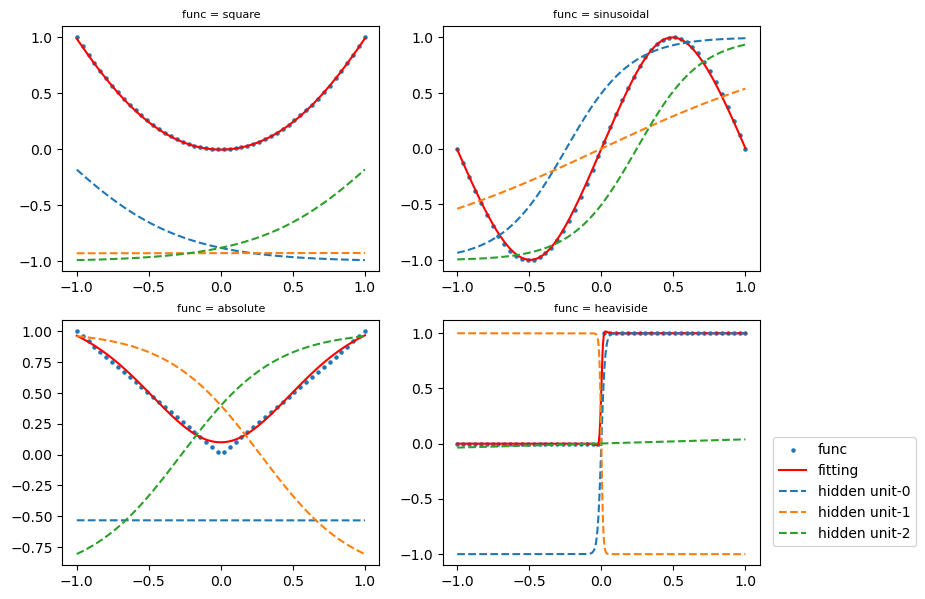

In [ ]:
def sinusoidal(x):
    return np.sin(np.pi * x)

def heaviside(x):
    return 0.5 * (np.sign(x) + 1)

def create_data(func, n=50):
    x = np.linspace(-1, 1, n)[:, None]
    return x, func(x)

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(3, activation='tanh', input_shape=(1,), name='mid_layer'))
    model.add(layers.Dense(1))
    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mse'])
    model.fit(x_train, y_train, epochs=10000, batch_size=1, verbose=0);
    return model

x_test = np.linspace(-1, 1, 1000)
func_list = [np.square, sinusoidal, np.abs, heaviside]

plt.figure(figsize=(9, 7))
for i, func in enumerate(func_list):
    x_train, y_train = create_data(func)
    # model = build_model()
    model = models.load_model(get_file(origin=base + 'data/func_{}.h5'.format(i)))
    
    y = model.predict(x_test)
    hidden = models.Model(inputs=model.input,
                          outputs=model.get_layer('mid_layer').output).predict(x_test) 
    
    plt.subplot(2, 2, i+1)
    plt.title("func = {}".format(func.__name__), fontdict = {'fontsize' : 8})
    plt.scatter(x_train, y_train, s=5, label='func')
    plt.plot(x_test, y, color="r", label='fitting')
    for j in range(3):
        plt.plot(x_test, hidden[:,j], linestyle='dashed', label=r"hidden unit-{}".format(j))
    
plt.legend(bbox_to_anchor=(1.02, 0.55), loc=2, borderaxespad=0.5)
plt.show()    

# Keras and Pytorch

Keras and PyTorch are open-source frameworks for deep learning gaining much popularity among data scientists.

1. Ease of Use: Keras is known for its simplicity and ease of use, making it a good choice for beginners or those without a deep technical background. On the other hand, PyTorch has a steeper learning curve, but offers more flexibility and control for experienced users.

2. Community Support: Both Keras and PyTorch have large and active communities, with extensive documentation, tutorials, and code examples available. Keras is a part of the TensorFlow ecosystem, which is backed by Google, while PyTorch is maintained by Facebook.

3. Deployment: Keras models can be deployed using TensorFlow, which is widely used in production environments. PyTorch models can be deployed using a variety of tools, including ONNX, TorchScript, and the PyTorch Mobile library.

4. Performance: Both libraries provide high-performance computations on both CPUs and GPUs. However, PyTorch is known for its dynamic computational graph, which can lead to faster training and inference times for certain types of models.

## Keras

The MNIST dataset is a popular benchmark dataset for image classification tasks. It consists of 60,000 training images and 10,000 test images of handwritten digits from 0 to 9. Each image is grayscale and has a resolution of 28 $\times$ 28 pixels. 

11490434/11490434 [==============================] - 0s 0us/step
training images:(60000, 28, 28), test images:(10000, 28, 28)


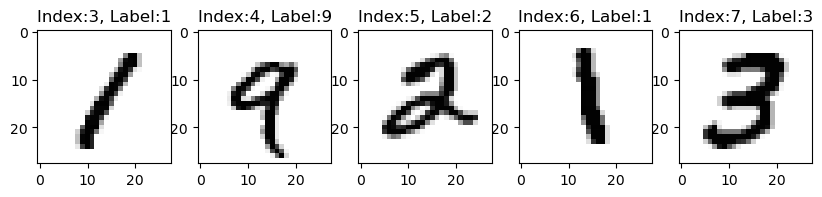

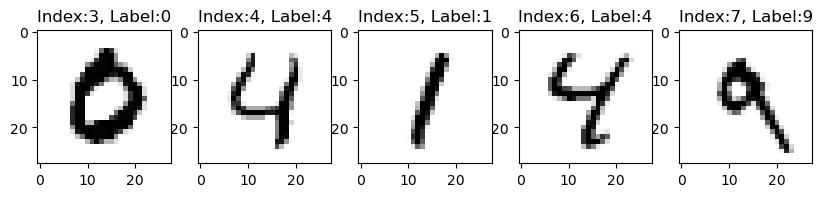

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('training images:{}, test images:{}'.format(train_images.shape, test_images.shape))

def showimg(data):
    idx  = 3
    span = 5
    if data=='train':
        images = train_images
        labels = train_labels
    if data=='test':
        images = test_images
        labels = test_labels
    plt.figure(figsize=(10,2))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        digit = images[idx+i]
        plt.imshow(digit, cmap=plt.cm.binary)
        plt.title('Index:{}, Label:{}'.format(idx+i, labels[idx+i]), fontsize = 12)
    plt.show()
    
showimg('train')
showimg('test')

We're using Keras to classify images into their 10 categories (0 through 9).

### Data Preparation
Before training, we reshape and scale the image data, and categorically encode the labels 

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/mnist_1.jpg" width="700">
</center>

which is executed in python code as follows
```python
train_images_reshape = train_images.reshape((60000, 28 * 28))
train_images_reshape = train_images_reshape.astype('float32') / 255
test_images_reshape = test_images.reshape((10000, 28 * 28))
test_images_reshape = test_images_reshape.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)
```

### Network Architecture

The core building block of neural networks is the *layer*, a data-processing module working as a filter for data. Specifically, layers extract representations out of the data fed into them in a more useful form which is often called features.

Most of deep learning consists of chaining together simple layers that will implement a form of progressive data distillation. A deep-learning model is like a sieve for data processing, made of a succession of increasingly refined data filters the layers.

```python
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
```

Here, our network consists of a sequence of two densely connected (fully connected) layers. 

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/mnist_2.jpg" width="700">
</center>
    
The weights of the first layer can be viewed as 512 28x28 filter images. The first layer compares the input images with these 512 filter images and generates 512 filter scores as output.

The second (and last) layer is a 10-way softmax layer. It aggregates the 512 filter scores into 10 probability scores using the softmax activation function. Each score represents the probability that the current digit image belongs to one of the 10 digit classes.

### Compilation

Before training the network, we need to perform a compilation step by setting up:

- An optimizer: the mechanism to improve its performance on the training data

- A loss function: the measurement of its performance on the training data

- Metrics to monitor during training and testing

```python
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
```

### Training the Network

We train the network as follows
```python
network.fit(train_images_reshape, train_labels_cat, epochs=5, batch_size=128, verbose=1);
```

The network will start to iterate on the training data in mini-batch of 128 samples, 5 times over (each iteration over all the training data is called an *epoch*). At each iteration, the network will compute the gradient of the weights with regard to the loss on the batch, and update the weights accordingly. After these 5 epochs, the network will have performed 2345 = 5 $\times$ ceil(60000 $\div$ 128) gradient updates.

Batch size impacts learning significantly. If your batch size is big enough, this will provide a stable enough estimate of what the gradient of the full dataset would be. By taking samples from your dataset, you estimate the gradient while reducing computational cost significantly. 

The lower you go, the less accurate your estimate will be, however in some cases these noisy gradients can actually help escape local minimum. When it is too low, your network weights can just jump around if your data is noisy and it might be unable to learn or it converges very slowly, thus negatively impacting total computation time.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step
Test accuracy is 97.91%
Out of 10000 testing images, 209 misclassified images.

plot weights of the first layer as a heatmap


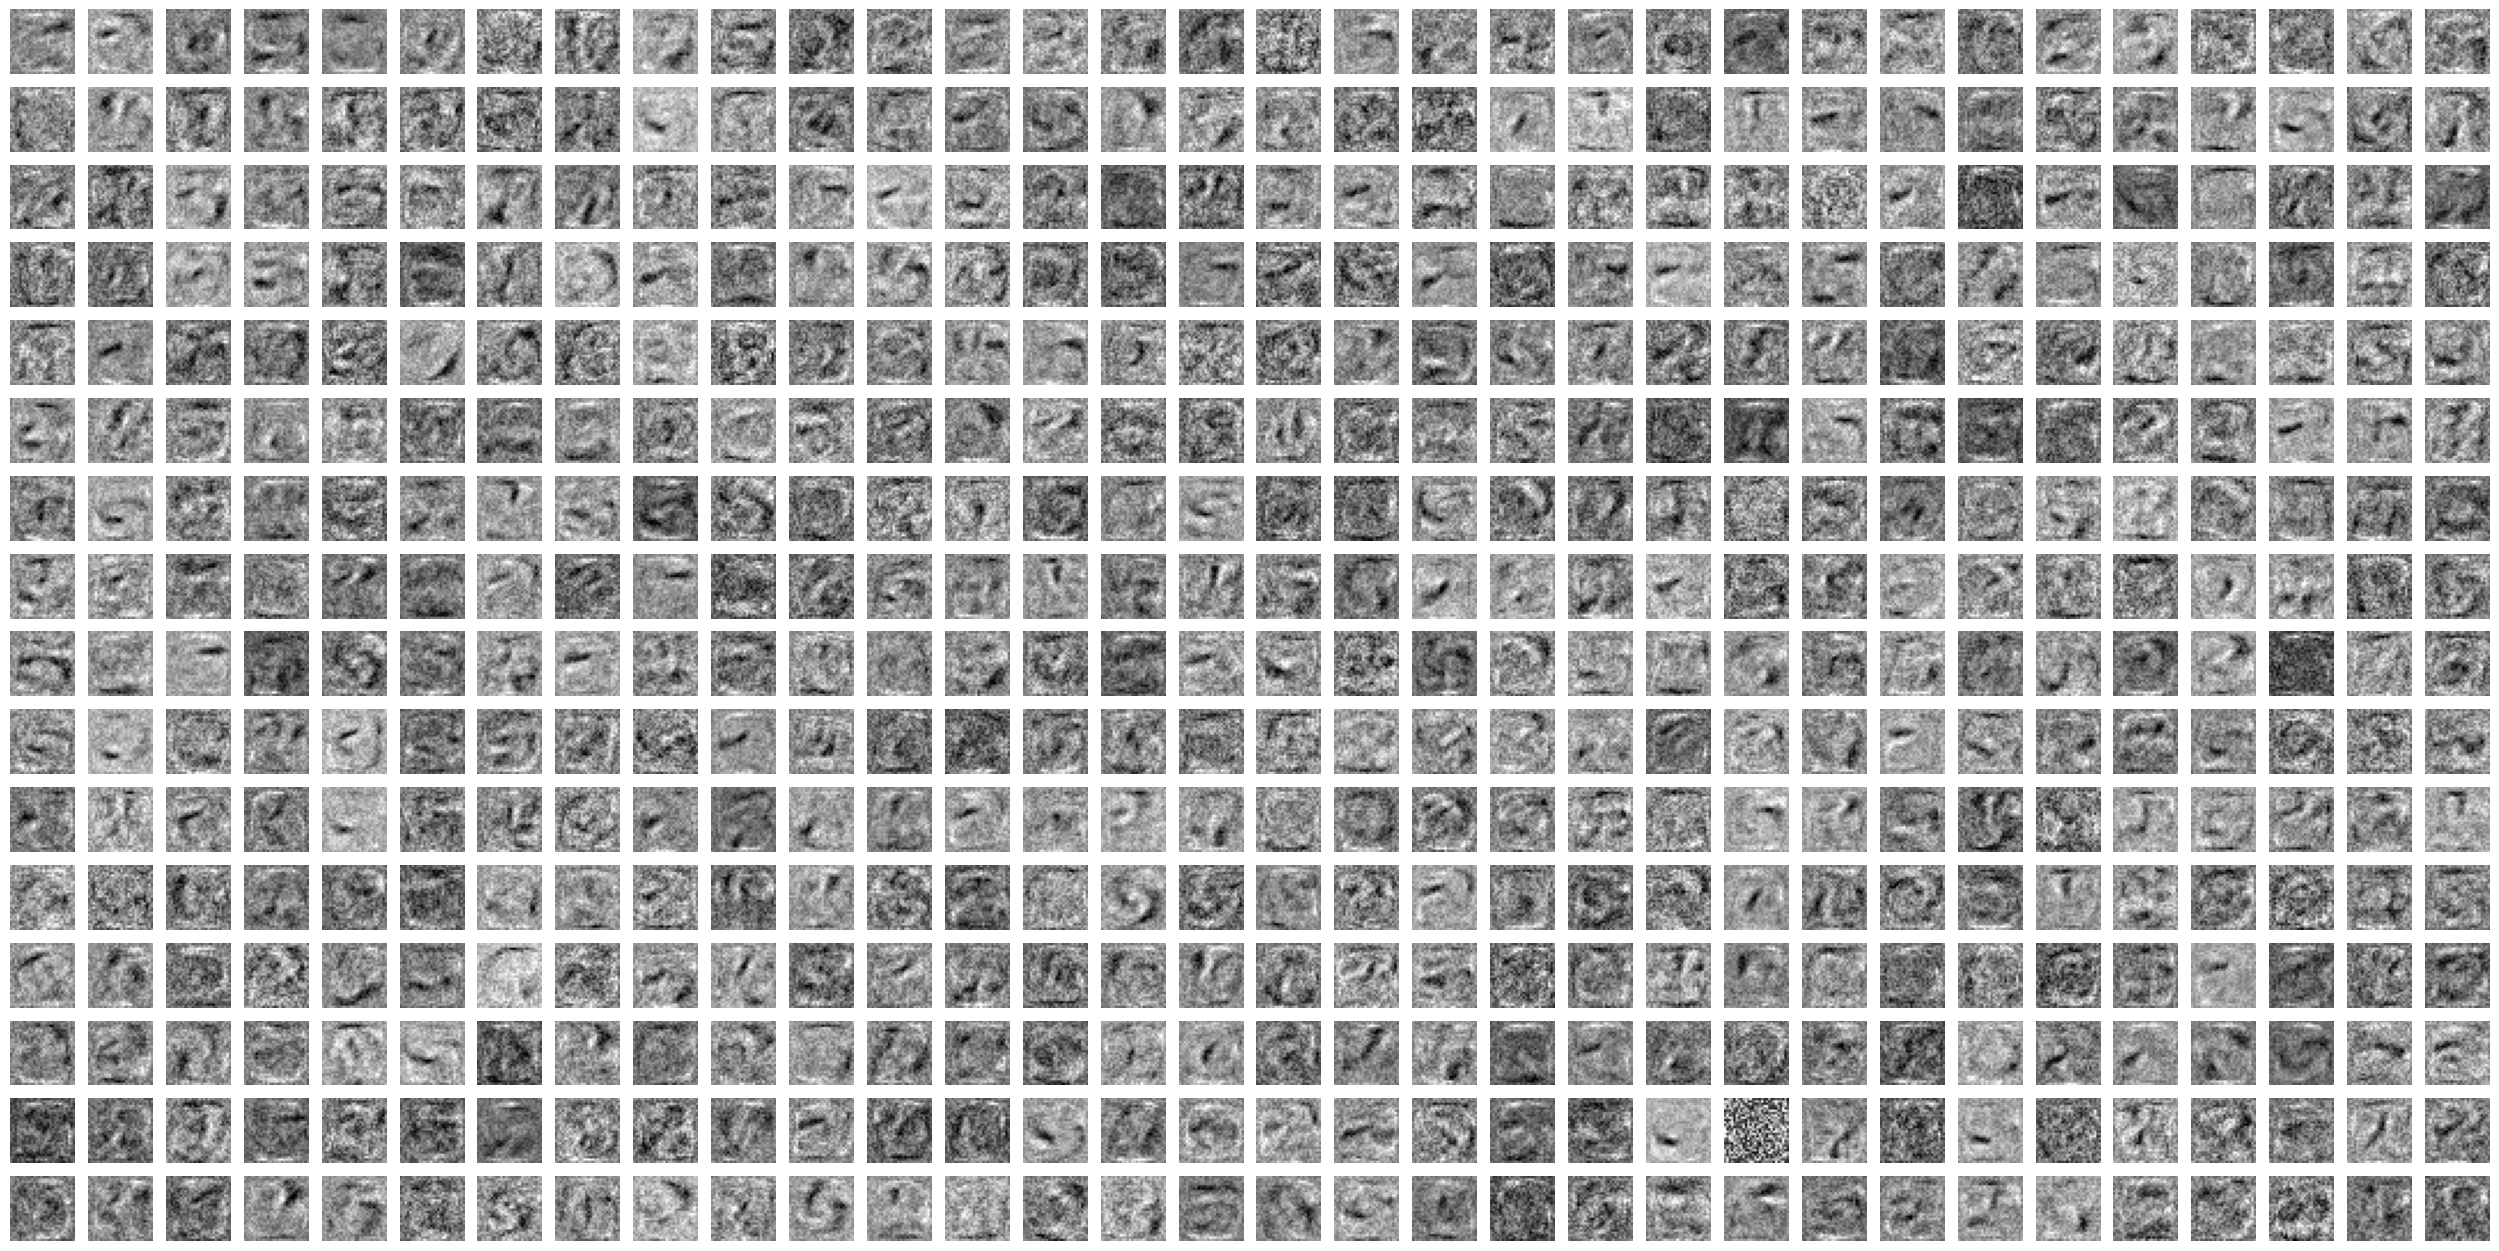

plot aggregated weights of both layers as a heatmap


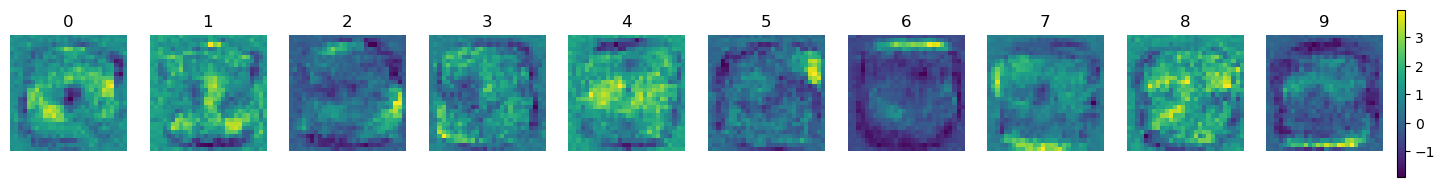

Examples of misclassified images 0-4


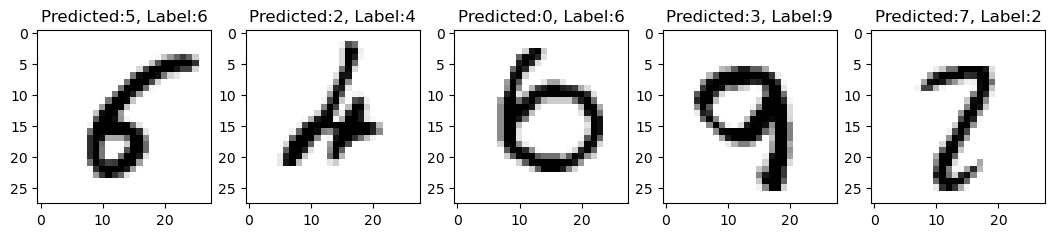

In [ ]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    model.fit(train_images_reshape, train_labels_cat, epochs=5, batch_size=128, verbose=1);
    # model.save('mnist_simple.h5')
    return model

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images_reshape = train_images.reshape((60000, 28 * 28))
train_images_reshape = train_images_reshape.astype('float32') / 255
test_images_reshape = test_images.reshape((10000, 28 * 28))
test_images_reshape = test_images_reshape.astype('float32') / 255
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)


# model = build_model()
model = models.load_model(get_file(origin=base + '/data/mnist_simple.h5'))

model.summary()
test_loss, test_acc = model.evaluate(test_images_reshape, test_labels_cat)

predicted = np.argmax(model.predict(test_images_reshape), axis=-1)
result = abs(predicted - test_labels)
misclassified = np.where(result>0)[0]
print('Test accuracy is {}%'.format(round(test_acc*100,2)))
print('Out of 10000 testing images, {} misclassified images.\n'.format(misclassified.shape[0]))

# # # # # # # # # # # # # # # # # # # # # # # #

# Get the weights of all layers
weights = [layer.get_weights() for layer in model.layers]

# Reshape the weights into 28x28 images
weight = np.reshape(weights[0][0], (28, 28, 512))

print('plot weights of the first layer as a heatmap')
fig, axs = plt.subplots(nrows=16, ncols=32, figsize=(32,16))
for i in range(16):
    for j in range(32):
        axs[i,j].imshow(weight[:,:,i*32+j], cmap='gray')
        axs[i,j].axis('off')
plt.show()

print('plot aggregated weights of both layers as a heatmap')
# Get aggregated weights and reshape
weight = (weights[0][0] @ weights[1][0]).reshape(28, 28, -1)
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(18,10))
for i, ax in enumerate(axes):
    ax.set_title(i)
    im = ax.imshow(weight[:,:,i], cmap='viridis')
    ax.axis('off')
fig.colorbar(im, ax=axes, fraction=0.006, pad=0.01)
plt.show()

index = 0
print('Examples of misclassified images {}-{}'.format(index, index+4))
plt.figure(figsize=(13,3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    idx = misclassified[i+index]
    digit = test_images[idx]
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.title('Predicted:{}, Label:{}'.format(predicted[idx], test_labels[idx]), fontsize = 12)
plt.show()

While the aggregated weights plots don't take into account activation functions and bias terms, they do provide some insight into how the neural network operates. For instance, the center of the 0 image displays strongly negative values, indicating that any color in the center of the image is less likely to be classified as 0.

## Pytorch

0.7%

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


100.0%
7.9%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100.0%
100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Epoch 1: Test Loss: 0.0018, Test Accuracy: 94.37%
Epoch 2: Test Loss: 0.0019, Test Accuracy: 94.23%
Epoch 3: Test Loss: 0.0015, Test Accuracy: 95.64%
Epoch 4: Test Loss: 0.0019, Test Accuracy: 95.48%
Epoch 5: Test Loss: 0.0017, Test Accuracy: 95.72%
Out of 10000 testing images. Total number of misclassified images is 1126. Examples of misclassified images 0-4


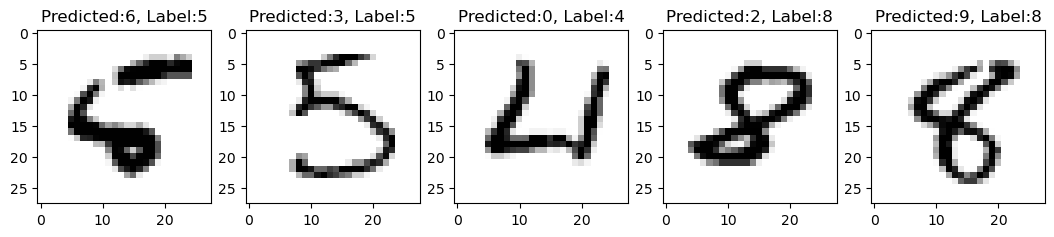

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

trainset = datasets.MNIST('./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = datasets.MNIST('./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 10)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = Net()
optimizer = optim.RMSprop(model.parameters())
criterion = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(trainloader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in testloader:
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(testloader.dataset)
    test_accuracy = 100. * correct / len(testloader.dataset)
    return test_loss, test_accuracy

for epoch in range(1, 6):
    train(epoch)
    test_loss, test_accuracy = test()
    print('Epoch {}: Test Loss: {:.4f}, Test Accuracy: {:.2f}%'.format(
        epoch, test_loss, test_accuracy))

index = 0
with torch.no_grad():
    predicted = model(testset.data.float())
    predicted = torch.argmax(predicted, dim=1)
    result = abs(predicted - testset.targets)
    misclassified = torch.where(result > 0)[0]
    print('Out of 10000 testing images. Total number of misclassified images is {}.'.format(misclassified.shape[0]),
          'Examples of misclassified images {}-{}'.format(index, index+4))

plt.figure(figsize=(13,3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    idx = misclassified[i+index]
    digit = testset.data[idx]
    plt.imshow(digit.squeeze(), cmap=plt.cm.binary)
    plt.title('Predicted:{}, Label:{}'.format(predicted[idx], testset.targets[idx]), fontsize = 12)
plt.show()

# Applications

In this section, we use neural networks to solve basic regression and classification problems.

Every machine learning task involves two fundamental components:

- Optimization: The process of tuning a model to achieve the best possible performance on the training data, which is the essence of learning in machine learning. 

- Generalization: The process of applying the trained model to new data that it has never seen before.

The main challenge in machine learning is to find a balance between optimization and generalization. The ultimate goal is to achieve good generalization, but this cannot be directly controlled. Instead, the model can only be adjusted based on its training data to increase its chances of generalizing well.

Overfitting occurs when the model cannot generalize, but well optimized to fit too closely to the training dataset instead. Overfitting happens in every machine-learning problem. Learning how to deal with overfitting is essential to mastering machine learning.

## Overfitting

Let's consider a simple polynomial fitting example to better illustrate overfitting.

Suppose we have observed 13 data points (called training data because we use data to train our forecasting model) that are generated from the function $\sin(2 \pi x)$ with some small perturbations. The figure below illustrates these training data in blue circles and the curve of $\sin(2 \pi x)$.
<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/overfit_polynomial_1.png" width="350">
</center>

Our task is to predict the underlying data pattern by using simple polynomial functions with degree 1, 3 and 9. In other words, without knowing the true function $\sin(2 \pi x)$, we need to 

1. fit the given 13 training data points with simple polynomial functions,
2. choose one of the polynomial functions to better represent the true function $\sin(2 \pi x)$ for forecasting future observations.

If you feel that the numerical example is not easy to comprehend, you may consider an application as follows.

<p style="margin-left:3%; margin-right:3%; font-style: italic">The green $\sin(2 \pi x)$ curve is the true underlying business cycle (which has an up-and-down pattern), and blue circles are observed sales. In an ideal world, sales are fully described by the business cycle. However, in the real world sales may be perturbed from the true business cycle by other random facts (such as weather). That explains why those blue circles are generated from the $\sin(2 \pi x)$ curve with small perturbations. Our goal is to offer an understanding (i.e., a polynomial function) to properly explain the underlying business cycle.</p>

The figure below shows the fitting polynomials with degree 1, 3 and 9 which are red curve (or line) in subgraphs.
<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/overfit_polynomial_2.png" width="800">
</center>

Note that a simple polynomial function with degree 1 is a linear function. Hence, the fitting procedure with a linear function is the well-known linear regression.

If we knew the underlying true function $\sin(2 \pi x)$, then it is quite clear that

- the linear function is under-fitting because it doesn't explain the up-and-down pattern in the training data;
- the polynomial function with degree 9 is over-fitting. Although the polynomial curve accurately describe the observed training data, it focuses too much on noises and does not correctly interpret the pattern of the underlying function LaTeX: \sin(2 \pi x);
- the polynomial with degree 3 is the best because it balances the information and noises and extracts the valuable information from the training data.

However, as in many real world applications, we do not know the underlying true pattern of the training data, i.e., the function $\sin(2 \pi x)$, in our example. We can only observe a figure as below. Then, the figure poses a simple question to all decision makers: which polynomial is the best to present the data pattern for future forecasting?

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/overfit_polynomial_3.png" width="800">
</center>
If we only consider the error measure, we may choose the polynomial function with degree 9 as our model candidate for future forecasting, because this polynomial function describes the training data with less error (it pretty much passes all data points exactly). The issue is that the polynomial function with degree 9 captures both the information (the value comes from the true function $\sin(2 \pi x)$) and noises (the perturbations on each data points). We may wonder if it is possible to identify the polynomial with degree 3 as the best function and balance the information and noises. 

The answer is positive. We can use holdout (or validation dataset) as follows:

- choose 3 (or any small number of) data points as testing data
- fit polynomial functions only on the remaining 10 data points
- find the best fitting function based on those 3 chosen data points (i.e. testing data)
The figure below illustrate the results where 3 orange circles are testing data points.

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/overfit_polynomial_4.png" width="800">
</center>

Apparently, we can rule out linear regression since it did a poor job on explaining the training data. Although 9-degree polynomial perfectly fits the training data, it performs horribly on the testing data. The Y values correspond to 3 testing data points are actually out of the chart for 9-degree polynomial. Hence, 3-degree polynomial is the obvious winner based on the testing data.

The example illustrates **the law of parsimony (Occam's razor)**: we generally prefer a simpler model because simpler models track only the most basic underlying patterns and can be more flexible and accurate in predicting the future!

<hr style="border:2px solid gray">

This polynomial fitting example demonstrates the use of a validation dataset for model selection. The best practice is to use K-fold cross-validation, which will be introduced in the section of predicting house prices.

To prevent a model from learning irrelevant or misleading patterns found in the training data, the best solution is to obtain more training data. A model trained on more data will naturally generalize better.

If obtaining more data is not possible, the next best solution is to limit the amount of information the model can store. By forcing the model to focus on the most prominent patterns, it has a better chance of generalizing well. 

The process of mitigating overfitting by reducing the model's ability to learn irrelevant patterns is called regularization. The most commonly used regularization techniques for neural networks are:

- Reducing the network's size
- Adding weight regularization
- Adding dropout

We will discuss and demonstrate the application of these techniques in the following sections.

## Predicting House Prices

We are attempting to predict the median price of homes in a given Boston suburb in the mid-1970s, given a few data points about the suburb at the time, such as the crime rate, the local property tax rate, etc.

- The data comprises 13 features (including, e.g., column 1 - Per capita crime rate, column 2 - Proportion of residential land zoned for lots over 25,000 square feet)

- The targets are the median values of owner-occupied homes, in thousands of dollars. The prices are typically between <span>&dollar;</span>10,000 and <span>&dollar;</span>50,000 in the mid-1970s.

The dataset has very few data points, only 506 in total, split between 404 training samples and 102 test samples, and each "feature" in the input data (e.g. the crime rate is a feature) has a different scale. For instance some values are proportions, which take a values between 0 and 1, others take values between 1 and 12, or between 0 and 100.

In [ ]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

train_data[0], train_targets[0]

(array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]),
 15.2)

In [ ]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

# linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
model = LinearRegression()
model.fit(train_data, train_targets)
y_pred = model.predict(test_data)
mae = mean_absolute_error(test_targets, y_pred)
    
# neural network
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])        
model.fit(train_data, train_targets, epochs=50, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print("mean absolute error of prediction")
print("linear regression:", mae)
print("neural network:", test_mae_score)

4/4 [==============================] - 0s 2ms/step - loss: 18.8997 - mae: 2.8777
mean absolute error of prediction
linear regression: 3.464185812406717
neural network: 2.8776769638061523


### K-fold Validation

To evaluate our network while we keep adjusting its parameters (such as the number of epochs used for training), we could simply split the data into a training set and a validation set. However, because we have so few data points, the validation set would end up being very small (e.g. about 100 examples). A consequence is that our validation scores may change a lot depending on which data points we choose to use for validation and which we choose for training, i.e. the validation scores may have a high variance with regard to the validation split. This would prevent us from reliably evaluating our model.

The best practice in such situations is to use K-fold cross-validation. It consists of splitting the available data into K partitions (typically K=4 or 5), then instantiating K identical models, and training each one on K-1 partitions while evaluating on the remaining partition. The validation score for the model used would then be the average of the K validation scores obtained.

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/k-fold_valid.png" width="500">
</center>
    
Let's train the network for 300 epochs. To keep a record of how well the model did at each epoch, we save the per-epoch validation score log.

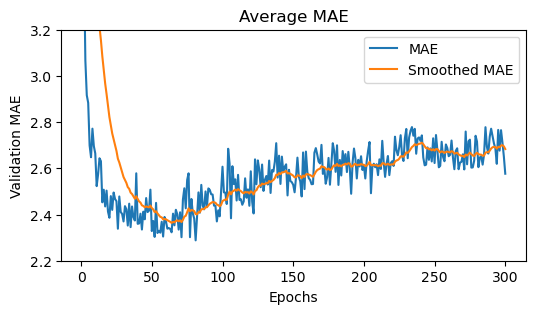

In [ ]:
import pickle
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras import models, layers

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# exponential smoothing a curve
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

def k_fold_validate():
    k = 5
    num_val_samples = len(train_data) // k
    num_epochs = 300
    all_scores = []
    all_mae_histories = []
    for i in range(k):
        print('processing fold #', i)
        
        # Prepare the validation data: data from partition # k
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

        # Prepare the training data: data from all other partitions
        partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                             train_data[(i + 1) * num_val_samples:]],
                                            axis=0)
        partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                                train_targets[(i + 1) * num_val_samples:]],
                                               axis=0)
        model = build_model()
        
        # Train the model (in silent mode, verbose=0)
        # use batch_size = 1 to get more detailed history
        history = model.fit(partial_train_data, partial_train_targets,
                            validation_data=(val_data, val_targets),
                            epochs=num_epochs, batch_size=1, verbose=0)
        
        # Evaluate the model on the validation data
        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
        all_scores.append(val_mae)

        mae_history = history.history['val_mae']
        all_mae_histories.append(mae_history)
    return all_mae_histories

# average_mae_history = np.mean(k_fold_validate(), axis=0)
average_mae_history = pickle.loads(urlopen(base + "data/boston.pkl").read())

smooth_mae_history = smooth_curve(average_mae_history)

# plot MAE     
fig = plt.figure(figsize=(6,3))
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history, label='MAE')
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history, label='Smoothed MAE')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.ylim(2.2, 3.2)
plt.title('Average MAE')
plt.legend()
plt.show()

K-fold cross-validation is a method used to obtain reliable estimations of a model's performance by minimizing the impact of chance through switching the training and testing datasets.

For example, let's consider three models:

- Model 1 is our current model with the following architecture:
```python
# model 1
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
```
- Model 2 has 128 neurons in the first layer, which is a hyperparameter:
```python
# model 2
model = models.Sequential()
model.add(layers.Dense(128, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
```
- Model 3 has fewer layers than Model 1:
```python
# model 3
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(1))
```
We can use K-fold cross-validation to evaluate the performance of these three models.

It's important to note that once we choose a model, its parameters need to be trained using the entire training dataset before the model is used.


## Classifying Movie Reviews

Binary classification, also known as two-class classification, is one of the most commonly used types of machine learning problems. In the following example, we will classify movie reviews as either positive or negative based on the textual content of the reviews.

The IMDB dataset is a commonly used dataset for machine learning tutorials related to text and language. It contains 50,000 movie reviews, with 25,000 in the training set and 25,000 in the testing set, collected from IMDB. Each review in the dataset has been labeled with a binary sentiment: positive (1) or negative (0). The following code loads the IMDB data:
```python
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
```
The raw data contains the text of each movie review. Keras provides a built-in function that replaces the raw text in both the training and testing datasets with integers based on the frequency of each word's occurrence in the entire training dataset. For instance the integer "3" encodes the 3rd most frequent word in the data. 

The resulting `x_train` is a numpy array containing 25,000 lists, and only the `num_words=10000` most frequent words are kept. Each list may have a different length due to different review lengths.

In [ ]:
from keras.datasets import imdb

# Get the data
max_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Get the word index and reverse it
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Print an example of the reverse word index
print("Example of dictionary:\n", dict(sorted(reverse_word_index.items())[10:15]))

# Decode a review from the training set and print it
review_index = 0
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[review_index]])
print('Review {} first 10 words coded in integers:\n'.format(review_index+1), x_train[review_index][:10])
print('Review {} text:\n'.format(review_index+1), decoded_review)

# Print the number of words in the decoded review and its sentiment
print('----------------------------------------------------')
print('Number of words:', len(decoded_review.split()))
print('Sentiment:', y_train[review_index])
# print('Indices for all ?s:', [x_train[index][i] for i, w in enumerate(decoded_review.split()) if w == '?'])

Example of dictionary:
 {11: 'this', 12: 'that', 13: 'was', 14: 'as', 15: 'for'}
Review 1 first 10 words coded in integers:
 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
Review 1 text:
 ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list

The reason we cannot simply feed lists of integers into a neural network is because integers have an inherent order, whereas the words represented by the integers do not. For instance, the 3rd and 4th most frequent words in a text are 'this' and 'that', respectively. It would be inappropriate to convey to the neural network that 'that' is greater than 'this', as this order has no real meaning in the context of natural language processing.

Before we delve into the details of word embedding in natural language processing, let's start by vectorizing a sentence using the `vectorize_sequences` function. For example, the short phrase 'this was' would be represented as [11,13] in training data. The `vectorize_sequences` function will represent this phrase as follows:
\begin{align}
\underbrace{(0,\ldots,\overbrace{1}^{\text{11th}},0,\ldots,0,\overbrace{1}^{\text{13th}},0,\ldots,0)}_{10000}
\end{align}

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

def validation_plot(history):
    acc = history['acc']
    val_acc = history['val_acc']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training')
    plt.plot(epochs, val_acc, 'r', label='Validation')
    plt.title('Training and validation accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training')
    plt.plot(epochs, val_loss, 'r', label='Validation')
    plt.title('Training and validation loss')
    plt.legend(bbox_to_anchor=(1.02, 0.2), loc=2, borderaxespad=0.5)
    plt.show()
    
print('example of vectorize_sequences on [[1,2,5],[3,5]]:')
print(vectorize_sequences([[1,2,5],[3,5]], dimension=10))    

example of vectorize_sequences on [[1,2,5],[3,5]]:
[[0. 1. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]]


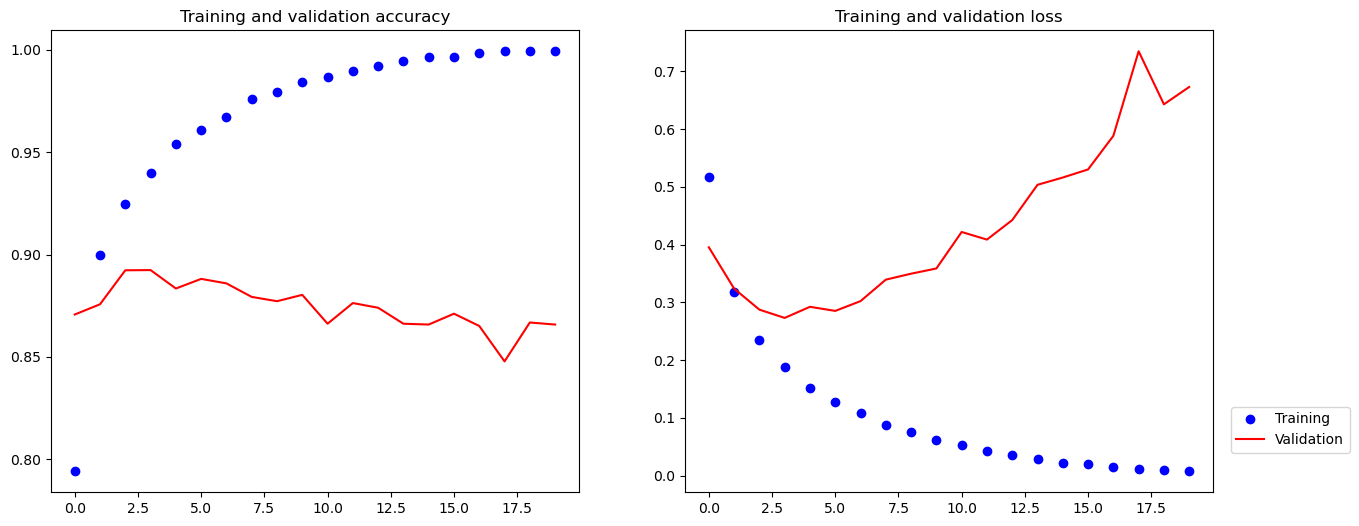

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# build model
def build_model(size=16):
    # preprocessing data
    x_train = vectorize_sequences(train_data)
    y_train = np.asarray(train_labels).astype('float32')
   
    model = models.Sequential()
    model.add(layers.Dense(size, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(size, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

    # partition to training and validation datasets
    x_val = x_train[:10000]
    partial_x_train = x_train[10000:]
    y_val = y_train[:10000]
    partial_y_train = y_train[10000:]

    history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                        validation_data=(x_val, y_val), verbose=0);
    history = history.history
    # save the model and history file
    model.save("imdb_1_{}.h5".format(size))
    with open('history_imdb_1_{}.pkl'.format(size), 'wb') as f:
        pickle.dump(history, f) 
    return model, history
    
# model, history = build_model()
model = models.load_model(get_file(origin = base + 'data/imdb_1_16.h5'))
history = pickle.loads(urlopen(base + "data/history_imdb_1_16.pkl").read())
validation_plot(history) 
K.clear_session()

The above figures indicate that during the training process, the training loss is expected to decrease and the training accuracy to increase with each epoch as the model parameters are optimized. However, it is common for the validation loss and accuracy to initially improve, but then start to worsen as the optimization continues. This is a sign of overfitting, where the model becomes too focused on the training data and fails to generalize well to new data that it has not seen before.

At the start of training, there is a positive correlation between optimization and generalization. As the model learns relevant patterns from the training data, both the training and validation losses decrease. During this stage, the model is said to be underfit, as it still has room for improvement in modeling the patterns in the training data.

However, after a certain number of iterations on the training data, the model begins to overfit. The validation loss stops improving and begins to increase, even as the training loss continues to decrease. This indicates that the model has started to learn patterns that are specific to the training data, but are irrelevant or misleading for new data.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

# predict first 100 reviews in testing set
predict = model.predict(x_test[:100,:]).flatten()
predict = (predict > 0.5).astype(int)
idx_incorrect = np.where(predict != y_test[:100])[0]

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4805 - accuracy: 0.8113
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2763 - accuracy: 0.9042
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2094 - accuracy: 0.9262
Epoch 4/4
4/4 [==============================] - 0s 36ms/step
Review:
 ? hollywood had a long love affair with bogus ? nights tales but few of these products have stood the test of time the most memorable were the jon hall maria ? films which have long since become camp this one is filled with dubbed songs ? ? and slapstick it's a truly crop of corn and pretty near ? today it was nominated for its imaginative special effects which are almost ? in this day and age ? mainly of trick photography the only outstanding positive feature which survives is its beautiful color and clarity sad to say of the many films made in this genre few of them come up to alexander ? original thief of ? almost any other ? n

In [ ]:
# show the 2nd (starting from 0 index) review predicted incorrectly
idx = idx_incorrect[1]
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[idx]])
print('Review:\n', decoded_review)
print('--------------------------')
print('Number of words:', len(decoded_review.split()))
print('sentiment:', y_test[idx])
print('predicted sentiment:', predict[idx])

### Comparing Network Sizes

One simple approach to prevent overfitting is to reduce the size of the model by decreasing the number of learnable parameters. This is often referred to as the model's *capacity* in deep learning. Intuitively, a model with more parameters has greater memorization capacity, which allows it to learn the features in the training samples more easily, but may lack generalization power, leading to overfitting.

There is a compromise to be found between too much capacity and not enough capacity. Unfortunately, there is no magical formula to determine the right number of parameters for a given problem.

Beside the original model with `build_model(size=16)`, we built a smaler model with `build_model(size=4)` and a larger model with `build_model(size=512)`. The figure below shows a comparison of their validation losses and accuracy with the original model.

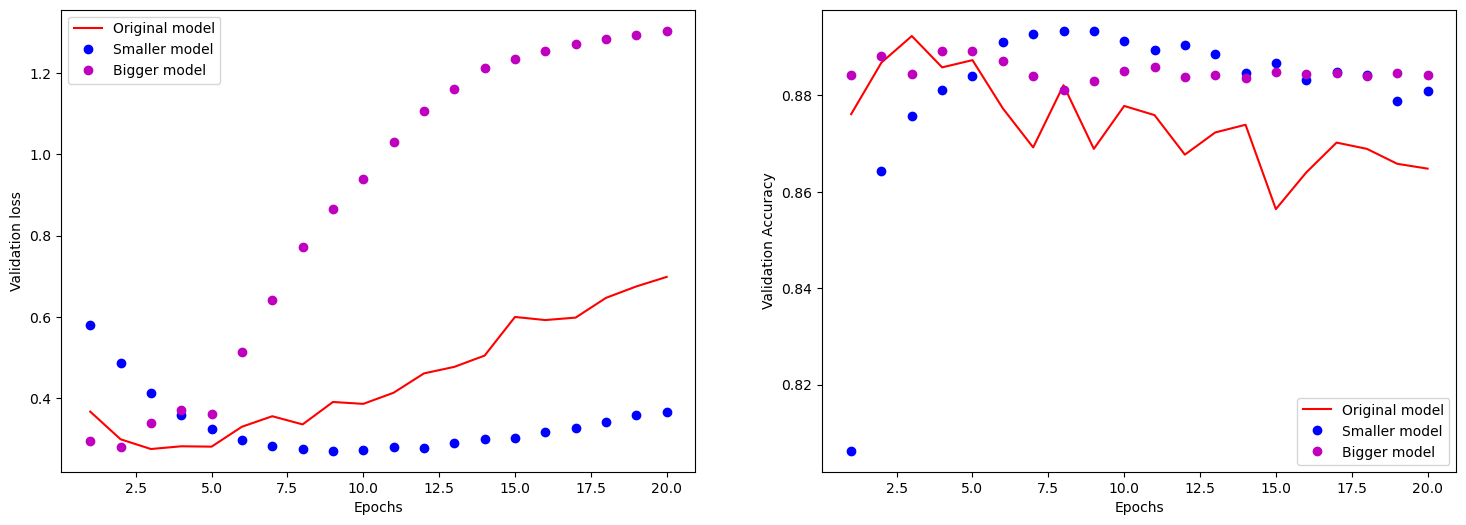

In [ ]:
original_val_loss = pickle.loads(urlopen(base + "data/history_imdb_1_16.pkl").read())['val_loss']
smaller_model_val_loss = pickle.loads(urlopen(base + "data/history_imdb_1_4.pkl").read())['val_loss']
bigger_model_val_loss = pickle.loads(urlopen(base + "data/history_imdb_1_512.pkl").read())['val_loss']

original_val_acc = pickle.loads(urlopen(base + "data/history_imdb_1_16.pkl").read())['val_acc']
smaller_model_val_acc = pickle.loads(urlopen(base + "data/history_imdb_1_4.pkl").read())['val_acc']
bigger_model_val_acc = pickle.loads(urlopen(base + "data/history_imdb_1_512.pkl").read())['val_acc']

epochs = range(1, len(original_val_loss)+1)

fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
plt.plot(epochs, original_val_loss, 'r', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.plot(epochs, bigger_model_val_loss, 'mo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, original_val_acc, 'r', label='Original model')
plt.plot(epochs, smaller_model_val_acc, 'bo', label='Smaller model')
plt.plot(epochs, bigger_model_val_acc, 'mo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

The smaller model starts overfitting later than the original model and the bigger network starts overfitting almost immediately.

The primary metric for evaluating a model's performance is the loss, which measures the difference between the predicted and actual values. A lower loss indicates that the model is better at making accurate predictions. While accuracy is also an important metric, it may not always provide a complete picture of a model's performance, especially if the data is imbalanced.

### Weight Regularization

While keeping the network size constant, one common way to address overfitting is to apply weight regularization techniques, which encourage the weights of the network to take on small values. This helps to prevent the network from being too sensitive to the training data and improves its ability to generalize to new data.

In [ ]:
def build_model():
    # preprocessing data
    x_train = vectorize_sequences(train_data)
    y_train = np.asarray(train_labels).astype('float32')
   
    from keras import regularizers
    model = models.Sequential()
    model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
    activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
    activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

    # partition to training and validation datasets
    x_val = x_train[:10000]
    partial_x_train = x_train[10000:]
    y_val = y_train[:10000]
    partial_y_train = y_train[10000:]

    history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                        validation_data=(x_val, y_val), verbose=0);
    history = history.history
    # save the model and history file
    model.save("imdb_1_l2.h5")
    with open('history_imdb_1_l2.pkl', 'wb') as f:
        pickle.dump(history, f) 
    return model, history

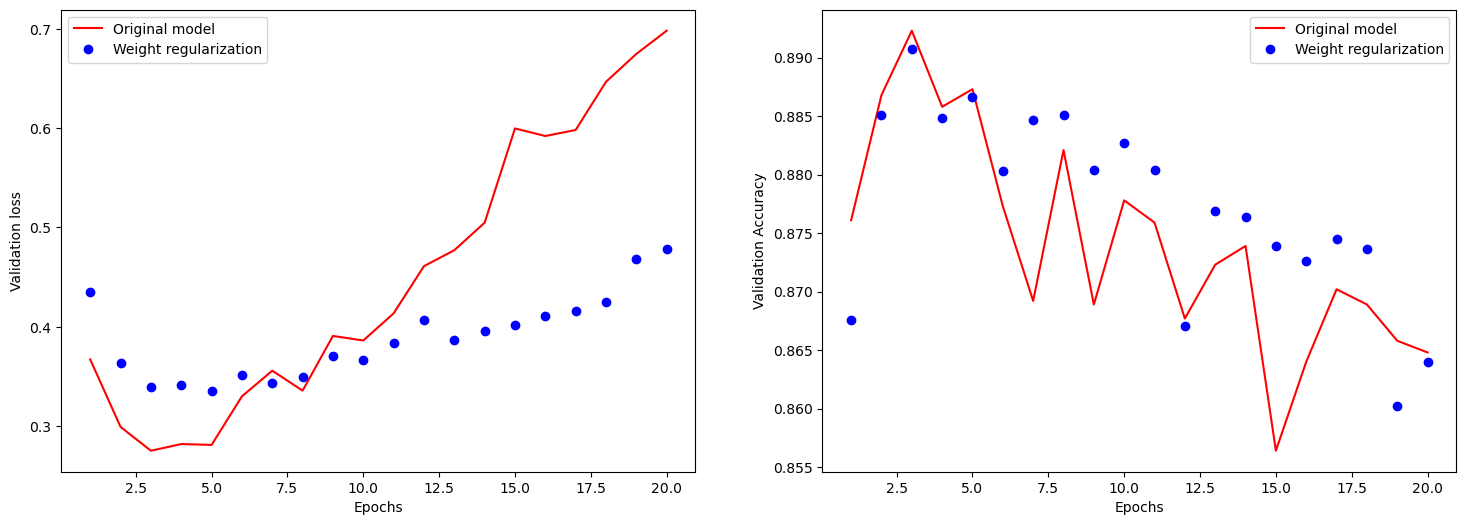

In [ ]:
original_val_loss = pickle.loads(urlopen(base + "data/history_imdb_1_16.pkl").read())['val_loss']
l2_model_val_loss = pickle.loads(urlopen(base + "data/history_imdb_1_l2.pkl").read())['val_loss']

original_val_acc = pickle.loads(urlopen(base + "data/history_imdb_1_16.pkl").read())['val_acc']
l2_model_val_acc = pickle.loads(urlopen(base + "data/history_imdb_1_l2.pkl").read())['val_acc']

epochs = range(1, len(original_val_loss)+1)

fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
plt.plot(epochs, original_val_loss, 'r', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='Weight regularization')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, original_val_acc, 'r', label='Original model')
plt.plot(epochs, l2_model_val_acc, 'bo', label='Weight regularization')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

### Dropout

One of the most common and effective methods for regularization in neural networks is dropout. This technique involves randomly "dropping out" (i.e., setting to zero) a number of output features in a layer during training. For instance, if a layer would normally produce the output vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training, applying dropout would yield a vector with some of its entries set to zero, such as [0, 0.5, 1.3, 0, 1.1]. The dropout rate is the fraction of output features that are zeroed out, and it is typically set between 0.2 and 0.5.

It's important to note that regularization techniques, like Dropout and weight regularization, are applied only during training and are turned off during testing (prediction).

In [ ]:
def build_model():
    # preprocessing data
    x_train = vectorize_sequences(train_data)
    y_train = np.asarray(train_labels).astype('float32')
   
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

    # partition to training and validation datasets
    x_val = x_train[:10000]
    partial_x_train = x_train[10000:]
    y_val = y_train[:10000]
    partial_y_train = y_train[10000:]

    history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                        validation_data=(x_val, y_val), verbose=0);
    history = history.history
    # save the model and history file
    model.save("imdb_1_dropout.h5")
    with open('history_imdb_1_dropout.pkl', 'wb') as f:
        pickle.dump(history, f) 
    return model, history

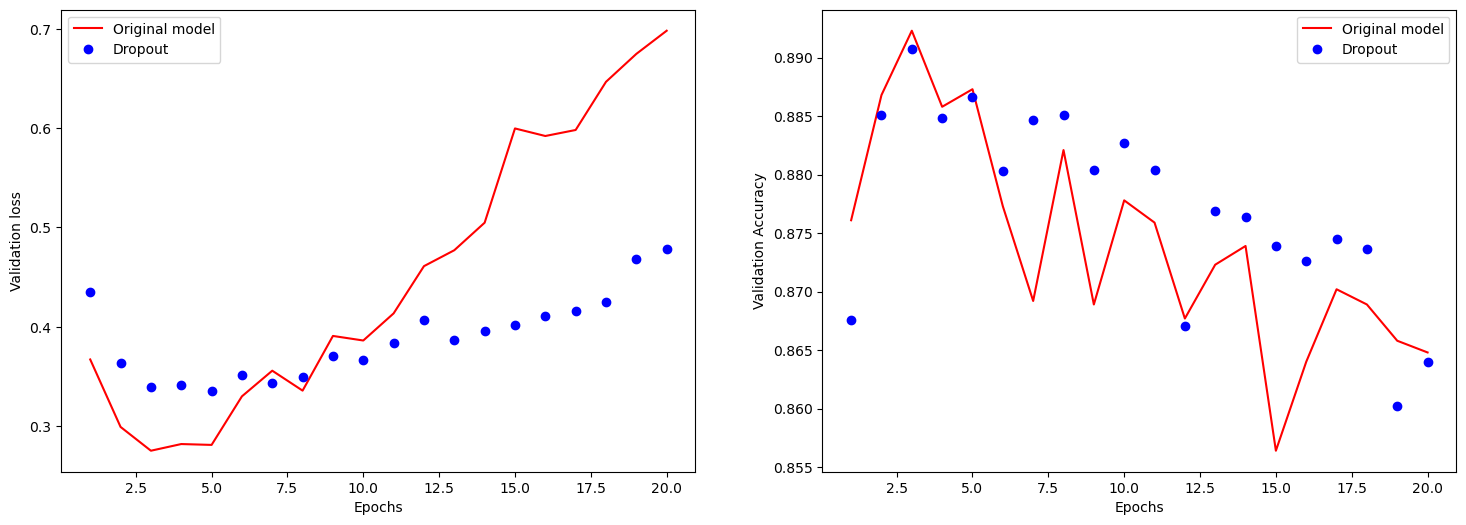

In [ ]:
original_val_loss = pickle.loads(urlopen(base + "data/history_imdb_1_16.pkl").read())['val_loss']
dropout_model_val_loss = pickle.loads(urlopen(base + "data/history_imdb_1_dropout.pkl").read())['val_loss']

original_val_acc = pickle.loads(urlopen(base + "data/history_imdb_1_16.pkl").read())['val_acc']
dropout_model_val_acc = pickle.loads(urlopen(base + "data/history_imdb_1_dropout.pkl").read())['val_acc']

epochs = range(1, len(original_val_loss)+1)

fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
plt.plot(epochs, original_val_loss, 'r', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, original_val_acc, 'r', label='Original model')
plt.plot(epochs, l2_model_val_acc, 'bo', label='Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

## Classifying Newswires

The previous section covered the topic of two-class classification using a densely connected neural network. In this section, we will focus on building a network that classifies Reuters newswires into 46 different topics. 

As we have multiple classes to classify, this problem is a multiclass classification problem. Specifically, this problem is an instance of single-label, multiclass classification because each news article belongs to only one topic. However, if each news article could belong to multiple topics, we would be dealing with a multilabel, multiclass classification problem.

In [ ]:
# Get the data
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Get the word index and reverse it
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Print an example of the reverse word index
print("Example of dictionary:\n", dict(sorted(reverse_word_index.items())[10:15]))

sample_index = 0
# Decode a review from the training set and print it
decoded_sample = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[sample_index]])
print('Sample:\n', decoded_sample)

# Print the number of words in the decoded review and its sentiment
print('----------------------------------------------------')
print('Number of words:', len(decoded_sample.split()))
print('Topic:', train_labels[sample_index])

550378/550378 [==============================] - 0s 0us/step
Example of dictionary:
 {11: 'vs', 12: 'dlrs', 13: 'it', 14: 'reuter', 15: '000'}
Sample:
 ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
----------------------------------------------------
Number of words: 87
Topic: 3


In [ ]:
to_categorical([[3],[2]])

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

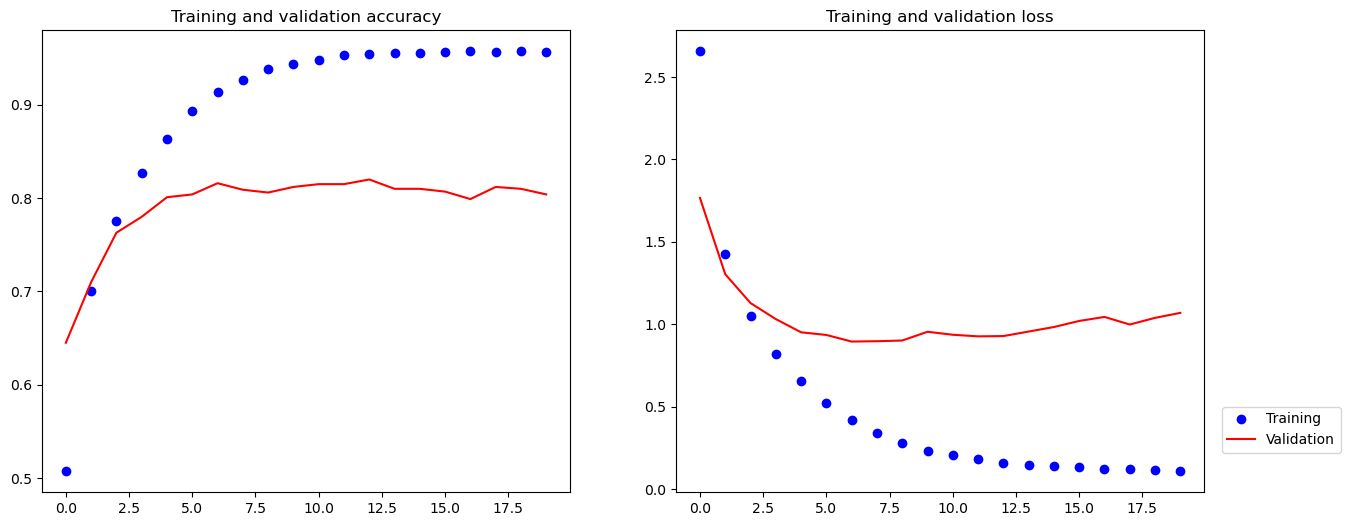

71/71 [==============================] - 2s 32ms/step - loss: 1.2369 - acc: 0.7841


[1.2369450330734253, 0.784060537815094]

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(46, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

    x_val = x_train[:1000]
    partial_x_train = x_train[1000:]
    y_val = one_hot_train_labels[:1000]
    partial_y_train = one_hot_train_labels[1000:]

    history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                        validation_data=(x_val, y_val), verbose=0);
    history = history.history
    # save the model and history file
    # model.save("reuters_1.h5")
    # with open('history_reuters_1.pkl', 'wb') as f:
    #     pickle.dump(history, f) 
    return model, history

model, history = build_model()
# model = models.load_model(get_file(origin = base + 'data/reuters_1.h5'))
validation_plot(history)
results = model.evaluate(x_test, one_hot_test_labels)
results

There are a few details to note about this neural network architecture:

- The network ends with a Dense layer of size 46. This means that for each input sample, the network will output a 46-dimensional vector, where each entry in the vector corresponds to a different output class.

- The last layer uses a softmax activation function, which was also used in the MNIST example. This means that the network will output a probability distribution over the 46 different output classes for every input sample. Specifically, the network will produce a 46-dimensional output vector, where output[i] is the probability that the sample belongs to class i. The probabilities for all 46 classes will sum to 1.

- Instead of using the to_categorical function to code the labels as a 0, 1 vector, we can also use the raw integer label as follows:
```python
y_train = np.array(train_labels)
y_test = np.array(test_labels)
```
    With integer labels, we should use `sparse_categorical_crossentropy` as the loss function:
```python
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
```

- Think about what could happen if the intermediate layers are significantly less than 46-dimensional, for example, 4-dimensional.
```python
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
```